## Step 1: Load Data
We start by downloading and loading the dataset `data_ffnn.txt`. The file consists of three columns: `x1`, `x2`, and `y`. This is a multi-class problem.


In [2]:
import pandas as pd

# Load the data
file_path = "data_ffnn.txt"  # Ensure this file is in your working directory
data = pd.read_csv(file_path, delim_whitespace=True, header=0, names=['x1', 'x2', 'y'])

# Display the first few rows
print(data.head())


         x1        x2  y
0  0.015546  0.807941  3
1  0.004527  1.426791  3
2  1.358103  1.193950  3
3  1.372911  0.218337  3
4  0.236595  0.281448  3


## Step 2: Plot the Data
Visualize the data in 2D, coloring each point according to its class.


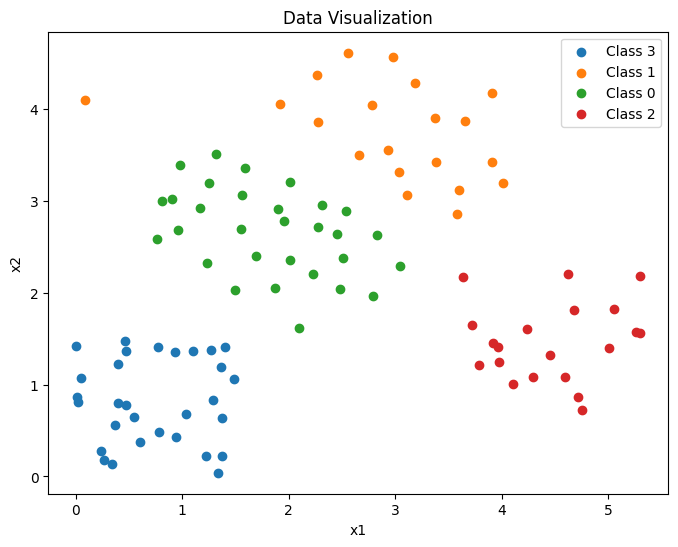

In [3]:
import matplotlib.pyplot as plt

# Plot the data
plt.figure(figsize=(8, 6))
for label in data['y'].unique():
    subset = data[data['y'] == label]
    plt.scatter(subset['x1'], subset['x2'], label=f'Class {label}')
    
plt.xlabel('x1')
plt.ylabel('x2')
plt.title('Data Visualization')
plt.legend()
plt.show()


## Step 3: Forward Propagation
We implement forward propagation for a feedforward neural network with three layers. The hidden layer will have `K` neurons.


In [4]:
import numpy as np

# Define the number of neurons in each layer
input_dim = 2  # x1, x2
hidden_dim = 4  # Example: 4 neurons in the hidden layer
output_dim = len(data['y'].unique())  # Number of classes

# Initialize weights and biases
np.random.seed(0)
V = np.random.randn(input_dim + 1, hidden_dim)  # Input to hidden layer weights (+1 for bias)
W = np.random.randn(hidden_dim + 1, output_dim)  # Hidden to output layer weights (+1 for bias)

# Prepare input data (add bias term)
X = np.hstack((np.ones((data.shape[0], 1)), data[['x1', 'x2']].values))  # Add bias as first column

# Forward propagation
# Hidden layer
F = 1 / (1 + np.exp(-np.dot(X, V)))  # Sigmoid activation
F = np.hstack((np.ones((F.shape[0], 1)), F))  # Add bias to hidden layer output

# Output layer
G = 1 / (1 + np.exp(-np.dot(F, W)))  # Sigmoid activation

# Calculate the error (SSE)
y_one_hot = np.eye(output_dim)[data['y'].astype(int)]  # One-hot encode the labels
E = 0.5 * np.sum((G - y_one_hot) ** 2)

# Display results
print("X:", X)
print("V:", V)
print("F:", F)
print("W:", W)
print("G:", G)
print("E (Error):", E)


X: [[1.00000000e+00 1.55463920e-02 8.07940924e-01]
 [1.00000000e+00 4.52693500e-03 1.42679068e+00]
 [1.00000000e+00 1.35810305e+00 1.19395041e+00]
 [1.00000000e+00 1.37291148e+00 2.18337347e-01]
 [1.00000000e+00 2.36595105e-01 2.81447509e-01]
 [1.00000000e+00 9.33743853e-01 1.35871424e+00]
 [1.00000000e+00 1.48493277e+00 1.06668369e+00]
 [1.00000000e+00 1.09770061e+00 1.36393981e+00]
 [1.00000000e+00 6.01310599e-01 3.74776020e-01]
 [1.00000000e+00 2.60145256e-01 1.79185576e-01]
 [1.00000000e+00 1.21891588e+00 2.20188560e-01]
 [1.00000000e+00 3.96446224e-01 1.22863377e+00]
 [1.00000000e+00 4.65880878e-01 1.47362617e+00]
 [1.00000000e+00 3.99958053e-01 8.00480017e-01]
 [1.00000000e+00 4.71700517e-01 1.36615925e+00]
 [1.00000000e+00 5.49834966e-01 6.50388491e-01]
 [1.00000000e+00 7.68439038e-01 1.40832972e+00]
 [1.00000000e+00 4.64235090e-02 1.07531800e+00]
 [1.00000000e+00 1.33652843e+00 4.09308350e-02]
 [1.00000000e+00 7.83076871e-01 4.88984718e-01]
 [1.00000000e+00 1.28923398e+00 8.377